In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

Image Size: (330, 500, 3)


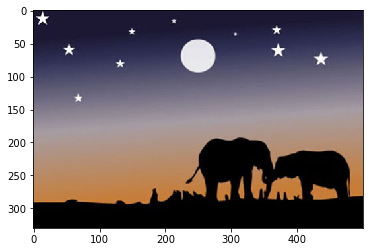

In [6]:
img = cv2.imread('elephant.jpg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
print("Image Size:", img.shape)
plt.imshow(img)
plt.show()

In [7]:
# Flatten each channel of image

all_pixels = img.reshape((-1,3))
print(all_pixels.shape)

(165000, 3)


In [9]:
from sklearn.cluster import KMeans

In [44]:
dominant_colors = 10

km = KMeans(n_clusters=dominant_colors)
km.fit(all_pixels)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [45]:
centers = km.cluster_centers_

In [46]:
centers = np.array(centers,dtype='uint8')

In [47]:
 print(centers)

[[134 127 143]
 [ 30  26  53]
 [  1   0   1]
 [192 128  71]
 [233 232 236]
 [ 78  77 104]
 [165 151 152]
 [106 102 124]
 [ 49  48  82]
 [180 142 115]]


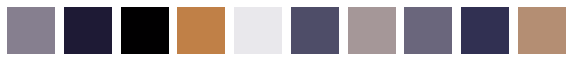

In [49]:
# Plot the colors
i = 1
plt.figure(0,figsize=(10,10))

colors = []

for color in centers:
    plt.subplot(1,10,i)
    i+=1
    plt.axis('off')
    
    colors.append(color)
    
    arr = np.zeros((100,100,3), dtype='uint8')
    arr[:,:,:] = color
    plt.imshow(arr)
    
plt.show()

In [50]:
img_shape = img.shape

In [51]:
print(km.labels_)
print("len:",len(km.labels_))

[1 1 1 ... 2 2 2]
len: 165000


In [52]:
new_img = np.zeros(img_shape,dtype='uint8')
new_img = new_img.reshape(-1,3)

for px in range(new_img.shape[0]):
    new_img[px] = colors[km.labels_[px]]
    
new_img = new_img.reshape(img.shape)

print(new_img.shape)

(330, 500, 3)


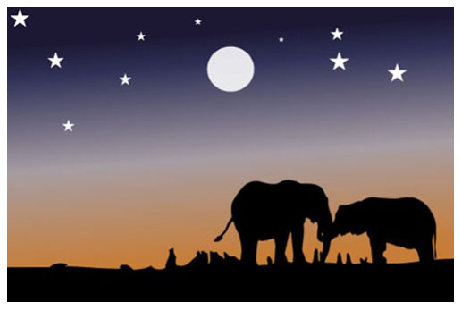

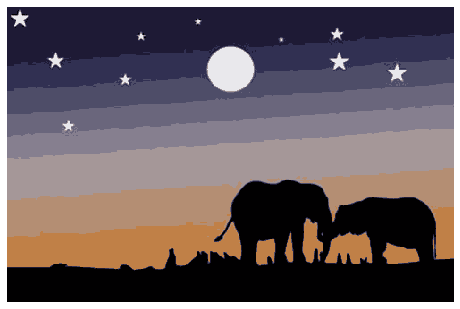

In [53]:
plt.style.use('seaborn')
plt.axis('off')
plt.imshow(img)
plt.show()
plt.axis('off')
plt.imshow(new_img)
plt.show()
